## Install packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from numpy import asarray
from numpy import savetxt
import matplotlib.colors as mcolors
import matplotlib.cm
import matplotlib.patches as mpatches
import umap
import matplotlib as mpl
import scanpy as sc
import scipy
import kmapper as km
from kmapper import jupyter
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
import plotly.graph_objs as go
import sys
from sklearn import ensemble
import tqdm
from ripser import Rips
from ripser import ripser
from persim import plot_diagrams
from sklearn.metrics.pairwise import euclidean_distances

## Read in data

In [2]:
pd_data = pd.read_csv("sc_Normalized.csv", sep=',', header = 0, index_col = 0)
np_data = pd_data.values 

pd_hnsc_data = pd.read_csv("hnsc_Normalized_na.csv", sep=',', header = 0, index_col = 0)
np_hnsc_data = pd_hnsc_data.values
N_hnsc = np_hnsc_data.shape[1]

np_data = np.append(np_data, np_hnsc_data, axis = 1)
labels = np.append(np.array(pd_data.columns), np.array(pd_hnsc_data.columns))

pd_data = pd.DataFrame(np_data, index = pd_data.index, columns = labels)
np_data = pd_data.values
print("Data shape: "+repr(np_data.shape))

Data shape: (23862, 1229)


In [3]:
pd_data

,TCGA-56-6546,TCGA-85-A50Z,TCGA-18-3409,TCGA-52-7809,TCGA-21-1080,TCGA-77-8008,TCGA-66-2780,TCGA-56-8083,TCGA-85-7843,TCGA-63-A5M9,...,TCGA-CQ-5323,TCGA-CV-7263,TCGA-CV-6945,TCGA-P3-A5QE,TCGA-CV-7423,TCGA-CN-5364,TCGA-CQ-A4CD,TCGA-CN-A63V,TCGA-CV-A45R,TCGA-CV-7178
TSPAN6,3180.613507,4703.080581,6705.466751,3713.704395,3814.302200,1573.335345,2857.464784,2662.462678,5782.545432,4361.557659,...,1021.100269,1466.900840,2144.201236,1733.959094,1096.718307,2096.943466,1833.868831,1527.335057,2819.439259,1940.753958
DPM1,3781.097860,2319.455297,1864.633379,2833.243722,1800.001604,1266.256912,3216.634485,1508.695491,3513.054393,2490.653460,...,1588.109661,2394.488379,2403.343983,1547.867124,2721.404388,2046.606271,2315.854840,1263.007786,2108.765802,692.570945
SCYL3,480.843966,503.410487,637.085032,1398.868769,777.626168,855.090701,736.469487,1065.784931,472.680063,831.569911,...,753.777945,630.294418,258.178407,997.197964,638.783985,537.439032,652.389446,457.053390,818.712218,1422.743321
c1orf112,664.255908,581.650216,378.189488,1400.235732,624.310367,409.618975,700.903288,1117.774455,428.289652,1545.047152,...,498.952471,442.215564,400.385580,986.846130,867.278540,836.942126,932.572739,489.935937,293.403503,921.423417
FGR,1961.311697,2535.247808,1215.023137,399.744952,555.042656,1062.657755,785.929771,242.950898,1222.517650,599.236106,...,231.862926,1008.671889,152.462647,406.202706,75.825798,557.931328,234.319789,321.957888,459.678622,446.185776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000281789,7.766299,3.558203,5.713695,13.494845,7.373036,7.554291,9.528246,19.996060,3.424476,13.977688,...,9.426400,4.892826,9.375999,3.647902,3.883333,0.801538,21.089220,4.723877,3.192649,0.000000
ENSG00000281849,9.841254,2.387838,3.443572,23.330929,10.172457,3.737742,5.180793,14.997090,7.027841,1.582234,...,9.402240,1.305676,8.437996,8.223248,0.962755,4.243175,1.161711,7.027676,4.245588,1.958544
ENSG00000281896,23.410909,25.728023,15.941094,35.656925,46.186697,51.737766,15.571968,28.994117,59.287531,41.874191,...,29.941487,24.643996,18.699313,23.712000,26.252187,27.307912,20.193091,10.632666,24.361902,39.262258
ENSG00000281903,3.794517,3.561565,6.851476,2.575533,18.483294,16.742106,22.600684,2.999324,1.305884,3.220589,...,5.580770,4.111562,24.347269,7.331523,36.974288,6.776358,7.882718,9.442742,28.563100,14.394650


In [4]:
#reducer = umap.UMAP()
#UMAP = reducer.fit_transform(np_data.T)
#print(UMAP.shape)

#savetxt('sc_umap.csv', UMAP, delimiter=',')

In [5]:
UMAP = pd.read_csv("sc_umap.csv", sep=',', header = None)
UMAP = UMAP.values 

Primary = pd.read_csv("type_sc.csv", sep=',', header = 0)
Primary = Primary.values[:,0]
Primary = np.append(Primary, ["TCGA-HNSC"]*N_hnsc)

print("UMAP shape: "+repr(UMAP.shape))
print("Primary shape: "+repr(Primary.shape))

UMAP shape: (1229, 2)
Primary shape: (1229,)


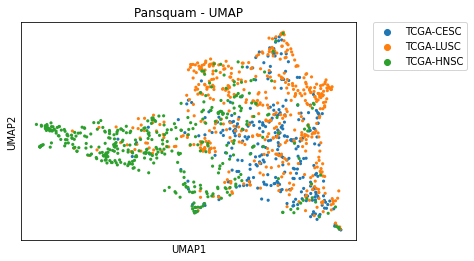

In [6]:
frame1 = sns.scatterplot(UMAP[:,0], UMAP[:,1], s=10, hue = Primary, linewidth = 0)
plt.title('Pansquam - UMAP')
#plt.xlim(-30000,25000)
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Distance Matrix

In [7]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection

In [8]:
np_data = np_data.T
N, d = np_data.shape
 
dist_mat = euclidean_distances(np_data, np_data)

In [9]:
savetxt('dist_mat_pansquam.csv', dist_mat, delimiter=',')

dist_mat = pd.read_csv('dist_mat_pansquam.csv', sep=",", header = None)
dist_mat = np.array(dist_mat )

In [10]:
print(dist_mat.shape)

(1229, 1229)


## Witness complex

In [11]:
from time import time
import numpy as np
from tda_utils.density_filtration import sort_distances_per_point, indices_for_density_filtration
from tda_utils.witness_complex import *

dist_per_pt = sort_distances_per_point(dist_mat)

# Load in ILC data
sct_sparse = np_data
dist_mat = dist_mat
n, d = sct_sparse.shape
print("n = "+str(n))
print("d = "+str(d))
print("shape of dist_mat: "+str(dist_mat.shape))

# Load in distances per point
distances_per_point = dist_per_pt

# time computation of density filtrations
print("Timing computation of density filtrations...")
density_indices = dict()
density_filtrations = dict()
ks = [10, 100, 1000]
#      10000]
ps = [0.01, 0.05, 0.1, 0.2]
for k in ks:
    for p in ps:
        print("\tk = "+str(k)+", p = "+str(p)+":")
        start = time()
        indices = indices_for_density_filtration(distances_per_point, k, p)
        density_indices[(k, p)] = indices
        mask = np.zeros(n, dtype=bool)
        mask[indices] = True
        sqr_mask = np.outer(mask, mask)
        density_filtrations[(k, p)] = np.reshape(dist_mat[sqr_mask], (len(indices), len(indices)))
        print("\t"+str(time()-start)+" seconds\n")

print("Timing computation of landmarks...")
landmark_indices = dict()
landmark_mats = dict()
pps = [0.05, 0.1, 0.2]
for k in ks:
    for p in ps:
        for pp in pps:
            print("\tk = "+str(k)+", p = "+str(p)+", pp = "+str(pp)+":")
            start = time()
            landmark_indices[(k, p, pp)], landmark_mats[(k, p, pp)] = choose_landmarks(density_filtrations[(k, p)], pp)
            print("\t"+str(time()-start)+" seconds\n")

print("Printing numbers of landmarks...")
for k in ks:
    for p in ps:
        for pp in pps:
            toople = (k, p, pp)
            print(str(toople)+": "+str(len(landmark_indices[toople])))
            if toople == (1000, 0.2, 0.2):
                print("saving")
                landmark_inds = landmark_indices[toople]
                dense_inds = density_indices[(k, p)]
                true_inds = [dense_inds[ind] for ind in landmark_inds]
                print(true_inds)
                to_save = np.vstack([sct_sparse[ind, :] for ind in true_inds])
                np.save("PanSquam_landmarks.npy", to_save)
                np.save("PanSquam_Racute_landmark_indices.npy", true_inds)

n = 1229
d = 23862
shape of dist_mat: (1229, 1229)
Timing computation of density filtrations...
	k = 10, p = 0.01:
	0.0020008087158203125 seconds

	k = 10, p = 0.05:
	0.0010004043579101562 seconds

	k = 10, p = 0.1:
	0.0020003318786621094 seconds

	k = 10, p = 0.2:
	0.002573728561401367 seconds

	k = 100, p = 0.01:
	0.0009953975677490234 seconds

	k = 100, p = 0.05:
	0.0020008087158203125 seconds

	k = 100, p = 0.1:
	0.0009999275207519531 seconds

	k = 100, p = 0.2:
	0.0020008087158203125 seconds

	k = 1000, p = 0.01:
	0.0010004043579101562 seconds

	k = 1000, p = 0.05:
	0.0020003318786621094 seconds

	k = 1000, p = 0.1:
	0.0018355846405029297 seconds

	k = 1000, p = 0.2:
	0.0019958019256591797 seconds

Timing computation of landmarks...
	k = 10, p = 0.01, pp = 0.05:
	0.0010006427764892578 seconds

	k = 10, p = 0.01, pp = 0.1:
	0.0 seconds

	k = 10, p = 0.01, pp = 0.2:
	0.0 seconds

	k = 10, p = 0.05, pp = 0.05:
	0.0 seconds

	k = 10, p = 0.05, pp = 0.1:
	0.0010001659393310547 seconds


## Visualize Landmarks

In [12]:
landmarks = np.load("PanSquam_landmarks.npy")

landmarks = true_inds
print(true_inds)

[405, 133, 1105, 549, 730, 857, 1186, 129, 975, 584, 811, 406, 1111, 498, 913, 1092, 619, 284, 1090, 995, 798, 1184, 1077, 932, 376, 155, 1217, 963, 1014, 782, 770, 960, 322, 987, 553, 106, 183, 222, 675, 390, 27, 969, 1084, 930, 750, 249, 489, 992, 233]


In [13]:
N, d = np_data.shape
genes = pd_data.columns

UMAP = np.array(UMAP)
print(UMAP.shape)

UMAP_landmark = np.zeros((1,2))
data_landmark = np.zeros((1,d))

#Going through all of the cells, if index in landmarks we should pull the associated gene expression data
for i in landmarks:
    next_cell = np_data[i,:]
    next_cell = np.reshape(next_cell, (1, d))
    data_landmark = np.append(data_landmark, next_cell, axis = 0)
        
    next_embedding = UMAP[i,:]
    next_embedding = np.reshape(next_embedding, (1,2))
    UMAP_landmark = np.append(UMAP_landmark, next_embedding, axis = 0)

#To get the indices to work out I have a row of zeros at the top that I need to omit
data_landmark = data_landmark[1:, :]    
UMAP_landmark = UMAP_landmark[1:, :]

print(data_landmark.shape)
print(UMAP_landmark.shape)

(1229, 2)
(49, 23862)
(49, 2)


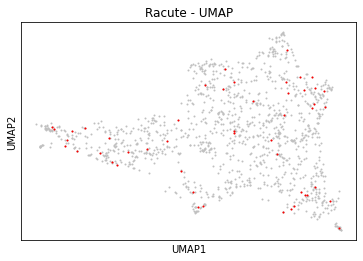

In [14]:
frame1 = plt.scatter(UMAP[:,0], UMAP[:,1], s=1, c = "silver")
frame1 = plt.scatter(UMAP_landmark[:,0], UMAP_landmark[:,1], s=1, c = "red")
plt.title('Racute - UMAP')
#plt.xlim(-30000,25000)
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.show()

## Persistence Diagrams

In [15]:
np_data.shape

(1229, 23862)

c:\users\hmkri\desktop\riesenfeld pearson\lib\site-packages\ripser\ripser.py:257: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


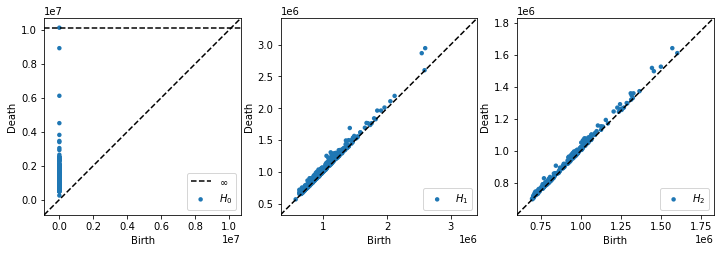

In [16]:
dgms = ripser(np_data, maxdim=2)['dgms']


plt.figure(figsize=(12, 4))
plot_diagrams(dgms, plot_only=[0], ax=plt.subplot(131))
plot_diagrams(dgms, plot_only=[1], ax=plt.subplot(132))
plot_diagrams(dgms, plot_only=[2], ax=plt.subplot(133))

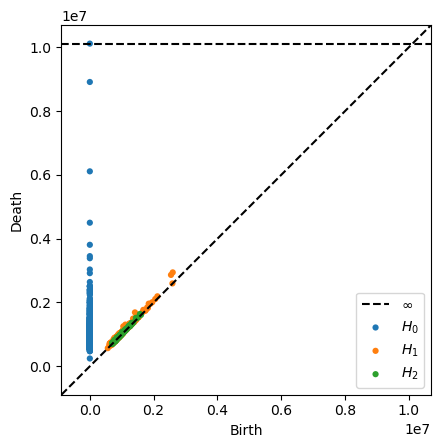

In [17]:
plot_diagrams(dgms, show=True)

In [18]:
data_landmark.shape

(49, 23862)

c:\users\hmkri\desktop\riesenfeld pearson\lib\site-packages\ripser\ripser.py:257: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


ValueError: zero-size array to reduction operation minimum which has no identity

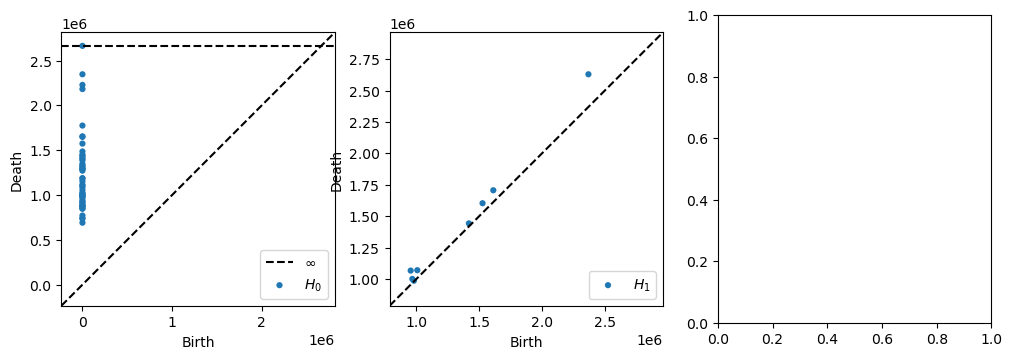

In [19]:
dgms = ripser(data_landmark, maxdim=2)['dgms']


plt.figure(figsize=(12, 4))
plot_diagrams(dgms, plot_only=[0], ax=plt.subplot(131))
plot_diagrams(dgms, plot_only=[1], ax=plt.subplot(132))
plot_diagrams(dgms, plot_only=[2], ax=plt.subplot(133))

In [ ]:
plot_diagrams(dgms, show=True)

## Eigen plots

In [20]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection, eigen_plot_numPoints, eigen_calc_from_dist_mat_withNumPoints
from manifold_utils.iga import chakraborty_express, iga

In [ ]:
for i in range(len(landmarks)):
    print(landmarks[i])
    center = landmarks[i]
    radii, eigval_list, eigvec_list = eigen_calc_from_dist_mat(np_data, dist_mat, center, radint = .01)

    rmin = radii[0]
    rmax = radii[-1]
    
    eigen_plot(eigval_list, radii, rmin, rmax)

405
